In [1]:
from fastai.tabular import *
import os
from sklearn import preprocessing


In [2]:
path = Path('/Users/bbabu/fastai/DataSamples')

df = pd.read_csv(path/'Output-5v5.csv', sep=',', header=0)
df_test = pd.read_csv(path/'Output-5v5-Test.csv', sep=',', header=0)
df_test_2 = pd.read_csv(path/'Output-5v5-Test.csv', sep=',', header=0)

df.drop(['Description'], axis=1, inplace=True)
df_test.drop(['Description'], axis=1, inplace=True)
df_test_2.drop(['Description'], axis=1, inplace=True)



In [3]:
# df = pd.read_csv(path/'Groups_with_Owners-V2.csv', sep=',', header=0)
# df_test = pd.read_csv(path/'Groups_without_Owners-V2.csv', sep=',', header=0)
# df_test_2 = pd.read_csv(path/'Groups_without_Owners-V2.csv', sep=',', header=0)

In [26]:
df = pd.read_csv(path/'Groups_with_Owners-V1.csv', sep=';', header=0)
df_test = pd.read_csv(path/'Groups_without_Owners-V1.csv', sep=';', header=0)
df_test_2 = pd.read_csv(path/'Groups_without_Owners-V1.csv', sep=';', header=0)

In [5]:
# df.dtypes

In [27]:
df.drop(['Description', 'MemberDN', 'State'], axis=1, inplace=True)
df_test.drop(['Description', 'MemberDN', 'State', 'Owner'], axis=1, inplace=True)
df_test_2.drop(['Description', 'MemberDN', 'State', 'Owner'], axis=1, inplace=True)

In [7]:
df.drop(['Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City'], axis=1, inplace=True)
df_test.drop(['Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City'], axis=1, inplace=True)
df_test_2.drop(['Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City'], axis=1, inplace=True)

In [29]:
df.drop_duplicates(keep='first',inplace=True) 
df_test.drop_duplicates(keep='first',inplace=True) 
df_test_2.drop_duplicates(keep='first',inplace=True) 

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
categorical = list(df.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    #print(cat)
    df[cat].fillna('N/A', inplace=True)
    df[cat] = le.fit_transform(df[cat].astype(str))

In [11]:
categorical = list(df_test.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    #print(cat)
    df_test[cat].fillna('N/A', inplace=True)
    df_test[cat] = le.fit_transform(df_test[cat].astype(str))

dep_var = 'Owner'
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'State', 'City']
cat_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
# cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Country', 'City']
# cont_names = ['Manager']
cont_names = []

#txt_cols = ['Description']

valid_idx = range(len(df)-1000, len(df))
#print(valid_idx)

procs = [FillMissing, Categorify, Normalize]

In [12]:
dep_var = 'Owner'
cat_names = []
# cont_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City', 'GroupCountry', 'GroupDomain', 'Domain']
# cont_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
cont_names = ['GroupDN', 'Member']


valid_idx = range(len(df)-20000, len(df))
procs = [FillMissing, Categorify, Normalize]

# df_test.head(10)



In [13]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_names=cont_names, test_df=df_test)

In [14]:
# print(data)

In [15]:
#??TabularDataBunch.from_df

data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         .split_by_idx(list(range(1,1000)))
        .split_by_idx(valid_idx)
#         .split_by_rand_pct(0.7)
#         .split_none()
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))
        .databunch())

In [16]:
# (cat_x,cont_x),y = next(iter(data.train_dl))
# for o in (cat_x, cont_x, y): print(to_np(o[:5]))

In [17]:
#learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
#learn = tabular_learner(data, layers=[1000,500], metrics=dice)
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [18]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


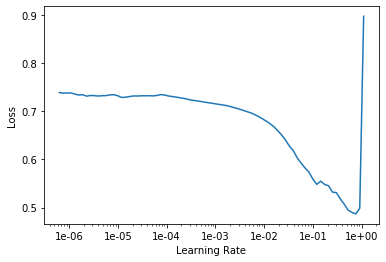

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.104394,0.109547,0.977950,02:11
1,0.112806,0.108862,0.977950,02:14


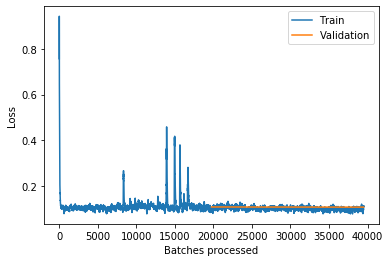

In [21]:
learn.recorder.plot_losses()

[(1, 0, 441)]

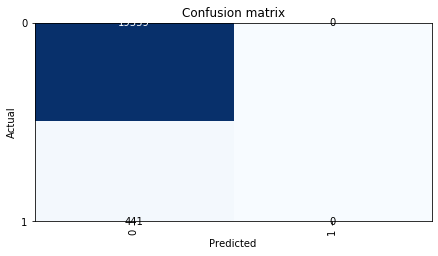

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()

In [23]:
learn.export()

In [24]:
preds = learn.get_preds(ds_type=DatasetType.Test)[1].numpy()
#preds = learn.get_preds(ds_type=DatasetType.Valid)[1].numpy()

In [30]:
final_df = pd.DataFrame({'GroupDN': df_test_2['GroupDN'],'Member': df_test_2['Member'], 'Manager': df_test_2['Manager'], 'Owner': preds})
final_df.to_csv(path/'MLProcessed-Fastai.csv', header=True, index=False)

In [31]:
#learn.show_results()

In [32]:
grouped = final_df.groupby(['GroupDN'])

In [33]:
i = 0
for name, group in grouped:
    if group['Owner'].sum() == 0:
        i += 1

In [34]:
# print("Feature importance table is as follows:")
# print(feature_imp.to_string())
# print(pred)
# print("Model accuracy is: %s"%(result))
print("Total number of predicted owners are: %s"%(preds.sum()))
print("Mean of owners are: %s"%(preds.mean()))
print("Total number of groups are: %s"%(len(grouped)))
print("Number of predicted groups with owners are: %s"%(len(grouped) - i))
# print("Accuracy score of the model is: %s"%(acc))

Total number of predicted owners are: 0
Mean of owners are: 0.0
Total number of groups are: 48963
Number of predicted groups with owners are: 0


In [ ]:
learn.summary()

In [ ]:
# ??tabular_learner